# EDA on Retail Sales Data

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('retail_sales_dataset.csv')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')


In [2]:
# Display the first few rows of the dataset
print(df.head(5))

   Transaction ID       Date Customer ID  Gender  Age Product Category  \
0               1 2023-11-24     CUST001    Male   34           Beauty   
1               2 2023-02-27     CUST002  Female   26         Clothing   
2               3 2023-01-13     CUST003    Male   50      Electronics   
3               4 2023-05-21     CUST004    Male   37         Clothing   
4               5 2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [3]:
df.tail(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


# Data Overview

In [4]:
# Display basic information about the dataset
print(df.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB
None


In [5]:
# Display summary statistics
print(df.describe())


       Transaction ID                           Date         Age     Quantity  \
count     1000.000000                           1000  1000.00000  1000.000000   
mean       500.500000  2023-07-03 00:25:55.200000256    41.39200     2.514000   
min          1.000000            2023-01-01 00:00:00    18.00000     1.000000   
25%        250.750000            2023-04-08 00:00:00    29.00000     1.000000   
50%        500.500000            2023-06-29 12:00:00    42.00000     3.000000   
75%        750.250000            2023-10-04 00:00:00    53.00000     4.000000   
max       1000.000000            2024-01-01 00:00:00    64.00000     4.000000   
std        288.819436                            NaN    13.68143     1.132734   

       Price per Unit  Total Amount  
count     1000.000000   1000.000000  
mean       179.890000    456.000000  
min         25.000000     25.000000  
25%         30.000000     60.000000  
50%         50.000000    135.000000  
75%        300.000000    900.000000  
max 

## Data Cleaning

In [6]:
# Check for missing values
print(df.isnull().sum())


Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [7]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Duplicate rows: {duplicate_rows}")


Duplicate rows: 0


In [8]:
df.shape



(1000, 9)

# Data Visualization

In [9]:
# Customer Gender Distribution
gender_dist = df['Gender'].value_counts()
print(gender_dist)

Gender
Female    510
Male      490
Name: count, dtype: int64


In [10]:
# Age Distribution
age_dist = df['Age'].describe()


In [11]:
# Total Amount Spent by Gender
gender_total_amount = df.groupby('Gender')['Total Amount'].sum()

Text(0.5, 1.0, 'Customer Gender Distribution')

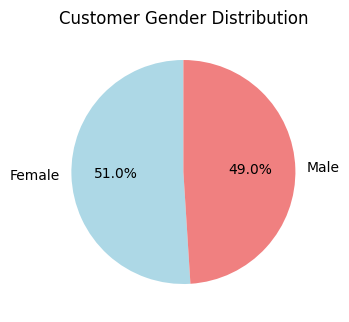

In [12]:
# Pie chart for gender distribution
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.pie(gender_dist, labels=gender_dist.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90)
plt.title('Customer Gender Distribution')

Text(0.5, 0, 'Gender')

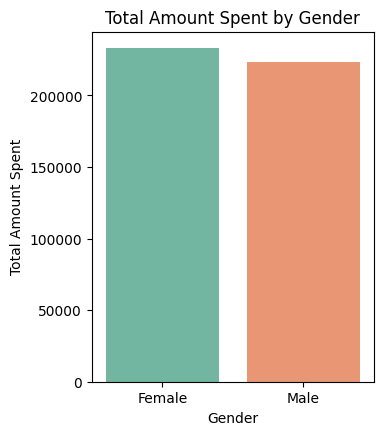

In [13]:
# Bar chart for total amount spent by gender
plt.figure(figsize=(8, 10))
plt.subplot(2, 2,2 )
sns.barplot(x=gender_total_amount.index, y=gender_total_amount.values, palette='Set2')
plt.title('Total Amount Spent by Gender')
plt.ylabel('Total Amount Spent')
plt.xlabel('Gender')


In [14]:
# Calculate average purchase value
average_purchase_value = df['Total Amount'].mean()
print(f'Average Purchase Value: {average_purchase_value:.2f}')

Average Purchase Value: 456.00


In [15]:
# Creating age groups using if-else conditions
def age_group(age):
    if age < 26:
        return '18-25'
    elif age <= 35:
        return '26-35'
    elif age <= 45:
        return '36-45'
    elif age <= 55:
        return '46-55'
    else:
        return '56-65'

# Applying the age_group function to create a new column 'Age Group'
df['Age Group'] = df['Age'].apply(age_group)


In [16]:
# Counting the number of purchases by each age group
age_group_count = df['Age Group'].value_counts()

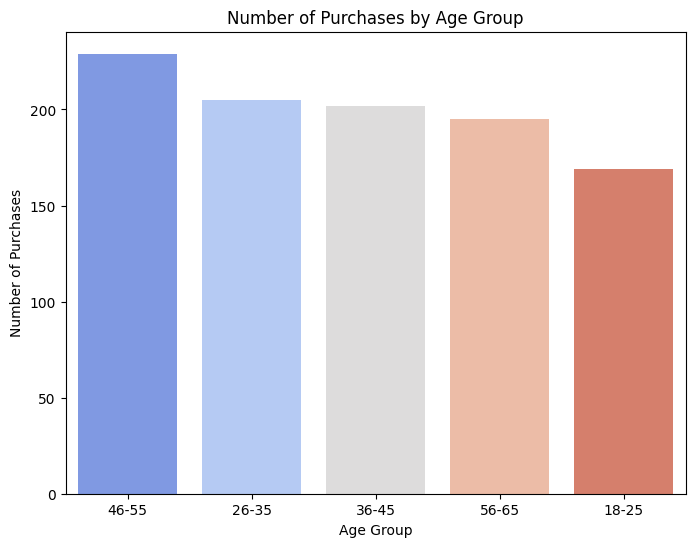

,count
Age Group,
46-55,229
26-35,205
36-45,202
56-65,195
18-25,169


In [17]:
# Plotting the results
plt.figure(figsize=(8, 6))
sns.barplot(x=age_group_count.index, y=age_group_count.values, palette='coolwarm')
plt.title('Number of Purchases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Purchases')
plt.show()

age_group_count

# Product Category Analysis

In [18]:
# Check how many products have been sold under each category.

df.groupby(['Product Category']).agg({'Quantity':np.sum}).reset_index()

,Product Category,Quantity
0,Beauty,771
1,Clothing,894
2,Electronics,849


In [19]:
# Total sales by product category
product_sales = df.groupby('Product Category')['Quantity'].sum()

In [20]:
# Total revenue by product category
product_revenue = df.groupby('Product Category')['Total Amount'].sum()

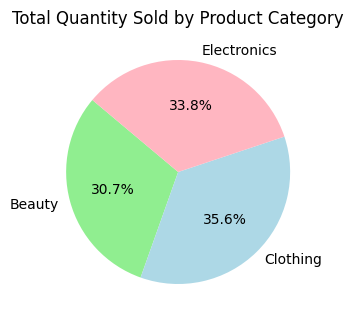

In [21]:
# Pie chart for total quantity sold by category
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.pie(product_sales, labels=product_sales.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightblue', 'lightpink'])
plt.title('Total Quantity Sold by Product Category')

plt.show()


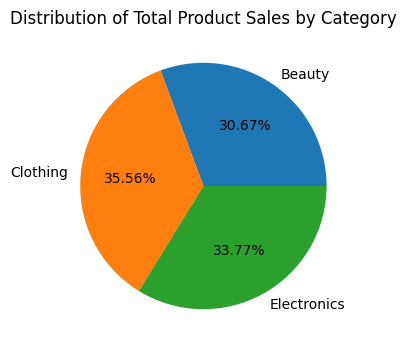

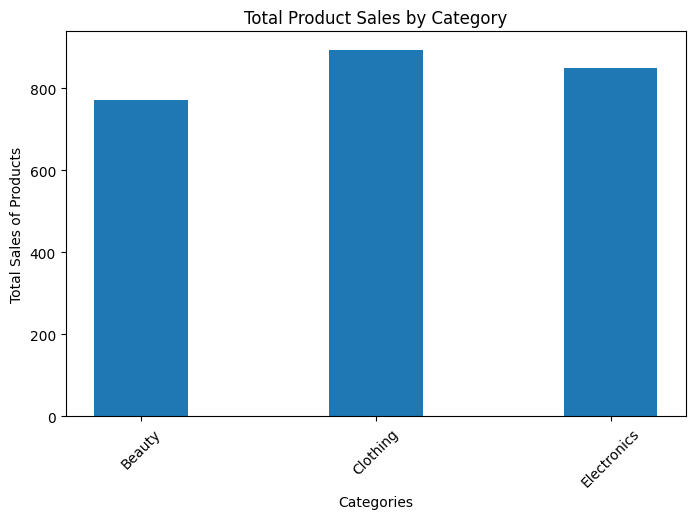

In [22]:

# Group by Product Category and aggregate the total quantity sold
df = df.groupby(['Product Category']).agg({'Quantity': np.sum}).reset_index()

# Pie chart for the distribution of total product sales by category
fig1 = plt.figure(figsize=(6, 4))
plt.pie(df['Quantity'], labels=df['Product Category'], autopct='%1.2f%%')
plt.title('Distribution of Total Product Sales by Category')
plt.show()

# Bar plot for total sales of products by category
fig2 = plt.figure(figsize=(8, 5))
plt.bar(df['Product Category'], df['Quantity'], width=0.4)
plt.xlabel("Categories")
plt.ylabel("Total Sales of Products")
plt.title('Total Product Sales by Category')
plt.xticks(rotation=45)
plt.show()




In [25]:
# Total sales over time
sales_over_time = df.groupby('Date')['Total Amount'].sum().reset_index()

# Interactive sales over time
fig = px.line(sales_over_time, x='Date', y='Total Amount', title='Total Sales Over Time (Interactive)')
fig.show()

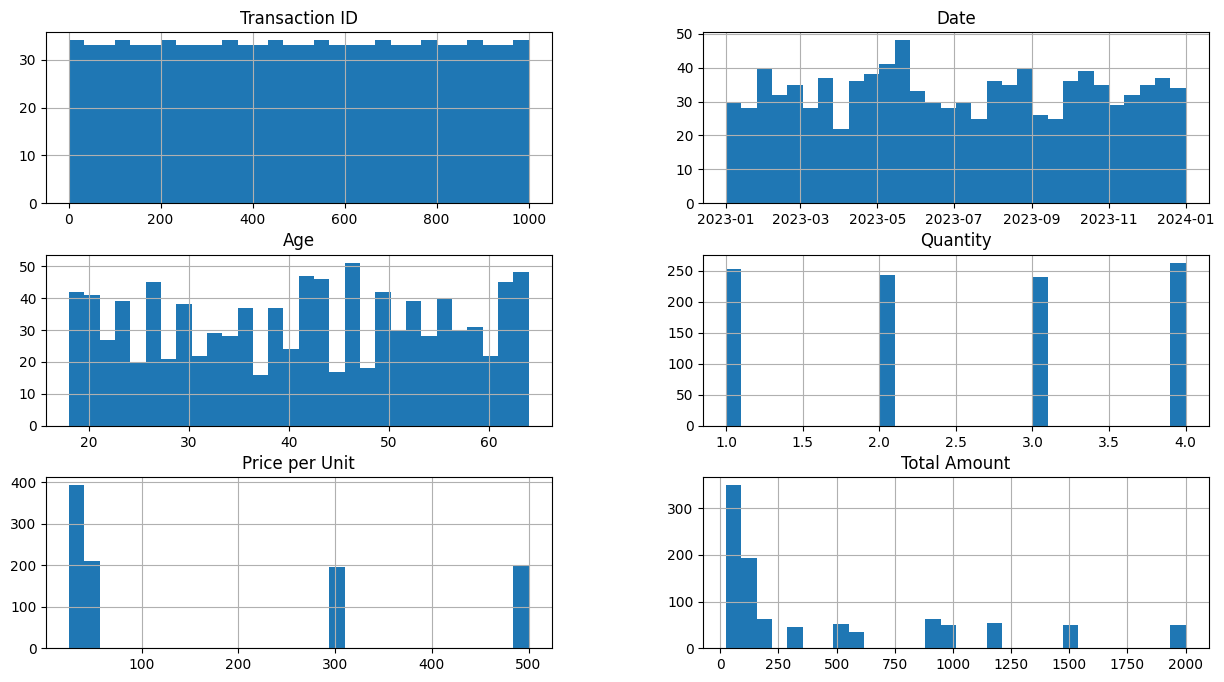

In [26]:
# Plot the histograms of each
df.hist(bins=30, figsize=(15,8))
plt.show()

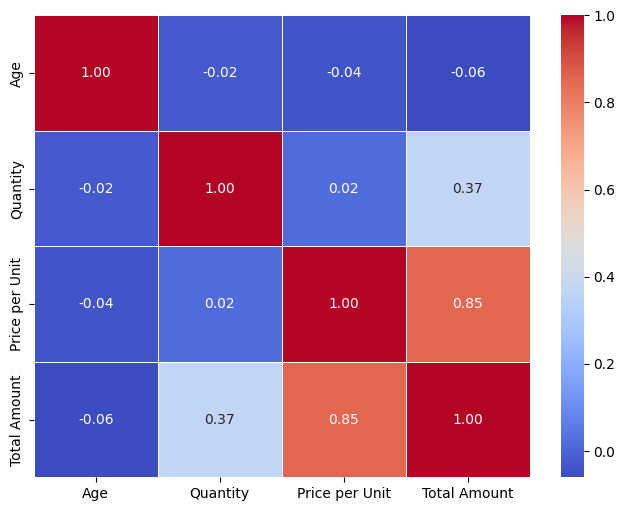

In [27]:

# Draw the heatmap with the correlation matrix
corr_matrix = df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.show()


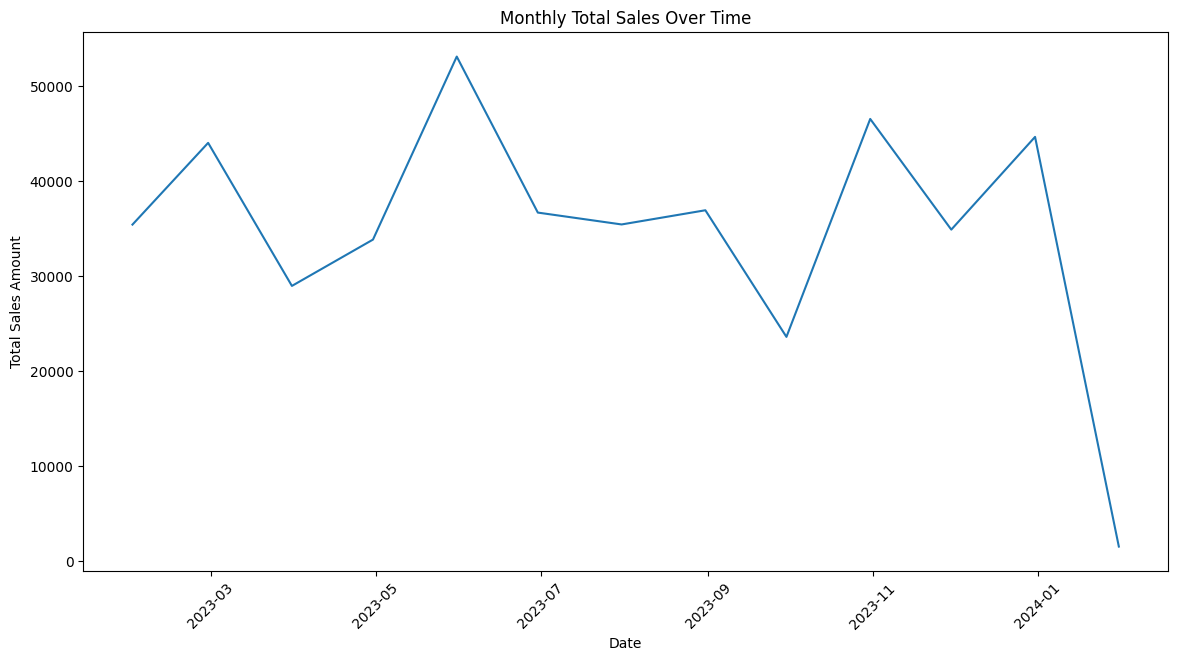

In [29]:
# Time Series Analysis
# Resampling to get monthly sales

monthly_sales = df.resample('M', on='Date')['Total Amount'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Total Amount', data=monthly_sales)
plt.title('Monthly Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()
